In [1]:
import dpkt
import os
from tqdm.auto import tqdm
import socket
from dpkt.compat import compat_ord
import requests
import time
import pandas as pd
from datetime import datetime
import socket
import tldextract
from typing import Union
tqdm.pandas()

/home/shaoormunir/.conda/envs/235project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_hostname(ip):
    try:
        return socket.gethostbyaddr(ip)[0]
    except:
        return None

In [3]:
df_ip_data = pd.read_csv('ip-data.csv')

In [4]:
df_ip_data_v6 = pd.read_csv('ip-data-ipv6.csv')

In [5]:
df_ip_data_v6

,level,parent,Topic / Item,Count,Average,Min Val,Max Val,Rate (ms),Percent,Burst Rate,Burst Start,Unnamed: 11
0,0,NaN,All Addresses,126254,NaN,NaN,NaN,0.0019,100%,5.51,67454.155,NaN
1,1,/All Addresses,ff02::fb,6988,NaN,NaN,NaN,0.0001,5.53%,0.10,19148.289,NaN
2,1,/All Addresses,ff02::c,256,NaN,NaN,NaN,0.0000,0.20%,0.07,19437.579,NaN
3,1,/All Addresses,ff02::2,92,NaN,NaN,NaN,0.0000,0.07%,0.01,2.232,NaN
4,1,/All Addresses,ff02::1:fffa:65e5,27,NaN,NaN,NaN,0.0000,0.02%,0.01,11028.026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,/All Addresses,2001:558:feed::2,517,NaN,NaN,NaN,0.0000,0.41%,0.08,15.737,NaN
189,1,/All Addresses,2001:558:feed::1,178,NaN,NaN,NaN,0.0000,0.14%,0.16,19209.583,NaN
190,1,/All Addresses,2001:558:feed:443::27,1725,NaN,NaN,NaN,0.0000,1.37%,0.70,67419.810,NaN
191,1,/All Addresses,2001:558:fd02:d02:f92c:bf48:8874:e4ae,15,NaN,NaN,NaN,0.0000,0.01%,0.03,945.328,NaN


In [6]:
df_ip_data.rename(columns={'Topic / Item': 'IP'}, inplace=True)

In [7]:
df_ip_data_v6.rename(columns={'Topic / Item': 'IP'}, inplace=True)

In [8]:
df_ip_data

,level,parent,IP,Count,Average,Min Val,Max Val,Rate (ms),Percent,Burst Rate,Burst Start,Unnamed: 11
0,0,NaN,Source IPv4 Addresses,1425222,NaN,NaN,NaN,0.0027,100%,5.31,252624.915,NaN
1,1,/Source IPv4 Addresses,99.84.238.96,21,NaN,NaN,NaN,0.0000,0.00%,0.08,450331.638,NaN
2,1,/Source IPv4 Addresses,99.84.238.217,35,NaN,NaN,NaN,0.0000,0.00%,0.25,449418.471,NaN
3,1,/Source IPv4 Addresses,99.84.238.204,47,NaN,NaN,NaN,0.0000,0.00%,0.17,449408.905,NaN
4,1,/Source IPv4 Addresses,99.84.238.202,732,NaN,NaN,NaN,0.0000,0.05%,1.67,449833.291,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,/Destination IPv4 Addresses,10.0.0.158,1,NaN,NaN,NaN,0.0000,0.00%,0.01,254884.825,NaN
1315,1,/Destination IPv4 Addresses,10.0.0.157,3,NaN,NaN,NaN,0.0000,0.00%,0.01,151204.531,NaN
1316,1,/Destination IPv4 Addresses,10.0.0.148,14,NaN,NaN,NaN,0.0000,0.00%,0.03,45910.053,NaN
1317,1,/Destination IPv4 Addresses,10.0.0.11,1076,NaN,NaN,NaN,0.0000,0.08%,1.60,324929.111,NaN


In [9]:
df_ip_data['hostname'] = df_ip_data['IP'].progress_apply(get_hostname)

100%|██████████| 1319/1319 [12:07<00:00,  1.81it/s] 


In [10]:
df_ip_data.hostname.value_counts()

s3-1.amazonaws.com                                     24
server-99-84-238-96.sfo5.r.cloudfront.net               2
edge-star-shv-01-sjc3.facebook.com                      2
nuq04s45-in-f14.1e100.net                               2
nuq04s45-in-f22.1e100.net                               2
                                                       ..
campus-076-200.ucdavis.edu                              1
campus-076-162.ucdavis.edu                              1
ec2-52-11-244-216.us-west-2.compute.amazonaws.com       1
a23-56-123-248.deploy.static.akamaitechnologies.com     1
cp4.noc.ucdavis.edu                                     1
Name: hostname, Length: 470, dtype: int64

In [11]:
df_ip_data_v6['hostname'] = df_ip_data_v6['IP'].progress_apply(get_hostname)

100%|██████████| 193/193 [01:01<00:00,  3.14it/s]


In [12]:
df_ip_data_v6[df_ip_data_v6.hostname.str.contains('facebook', na=False)]

,level,parent,IP,Count,Average,Min Val,Max Val,Rate (ms),Percent,Burst Rate,Burst Start,Unnamed: 11,hostname
79,1,/All Addresses,2a03:2880:f231:c7:face:b00c:0:7260,441,NaN,NaN,NaN,0.0,0.35%,0.21,61344.976,NaN,whatsapp-chatd-edge6-shv-01-sjc3.facebook.com
81,1,/All Addresses,2a03:2880:f131:83:face:b00c:0:25de,81,NaN,NaN,NaN,0.0,0.06%,0.23,67410.915,NaN,edge-star-mini6-shv-01-sjc3.facebook.com
82,1,/All Addresses,2a03:2880:f131:81:face:b00c:0:38d9,87,NaN,NaN,NaN,0.0,0.07%,0.12,347.145,NaN,whatsapp-chatd-msgr-mini-edge6-shv-01-sjc3.fac...
83,1,/All Addresses,2a03:2880:f031:b:face:b00c:0:8e,96,NaN,NaN,NaN,0.0,0.08%,0.20,346.141,NaN,edge-mqtt6-shv-01-sjc3.facebook.com
84,1,/All Addresses,2a03:2880:f031:a:face:b00c:0:2825,63,NaN,NaN,NaN,0.0,0.05%,0.11,20.551,NaN,edge-msgr-latest6-shv-01-sjc3.facebook.com
86,1,/All Addresses,2a03:2880:f031:12:face:b00c:0:2,34,NaN,NaN,NaN,0.0,0.03%,0.11,54484.072,NaN,edge-star6-shv-01-sjc3.facebook.com
87,1,/All Addresses,2a03:2880:f00d:3:face:b00c:0:1,49,NaN,NaN,NaN,0.0,0.04%,0.12,331.529,NaN,edge-mqtt6-shv-01-lax3.facebook.com
88,1,/All Addresses,2a03:2880:f00d:1:face:b00c:0:1,59,NaN,NaN,NaN,0.0,0.05%,0.13,187.734,NaN,edge-star6-shv-01-lax3.facebook.com
89,1,/All Addresses,2a03:2880:f00d:19:face:b00c:0:2825,2,NaN,NaN,NaN,0.0,0.00%,0.02,335.169,NaN,edge-msgr-latest6-shv-01-lax3.facebook.com


In [37]:
df_hostnames = df_ip_data[['hostname', 'Count', 'Percent']]

In [38]:
df_hostnames = df_hostnames.append(df_ip_data_v6[['hostname', 'Count', 'Percent']])

/tmp/ipykernel_39170/2376126191.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hostnames = df_hostnames.append(df_ip_data_v6[['hostname', 'Count', 'Percent']])


In [41]:
df_hostnames

,hostname,Count,Percent
1,server-99-84-238-96.sfo5.r.cloudfront.net,21,0.00%
2,server-99-84-238-217.sfo5.r.cloudfront.net,35,0.00%
3,server-99-84-238-204.sfo5.r.cloudfront.net,47,0.00%
4,server-99-84-238-202.sfo5.r.cloudfront.net,732,0.05%
5,server-99-84-238-168.sfo5.r.cloudfront.net,38,0.00%
...,...,...,...
182,g2600-1406-4400-0283-0000-0000-0000-1b01.deplo...,7,0.01%
183,g2600-1406-003c-0499-0000-0000-0000-28ae.deplo...,59,0.05%
184,g2600-1406-003c-0494-0000-0000-0000-28ae.deplo...,154,0.12%
188,cdns02.comcast.net,517,0.41%


In [40]:
# remove none values
df_hostnames = df_hostnames[df_hostnames.hostname.notna()]

In [21]:
def get_domain(url:Union[str, list[str]]) -> Union[str, list[str]]:

    """Function to get eTLD+1 from a URL.
    Args:
        url: URL
    Returns:
        eTLD+1
    """

    try:
        if (isinstance(url, list)):
            domains = []
            for u in url:
                u = tldextract.extract(u)
                domains.append(u.domain+"."+u.suffix)
            return domains
        else:
            u = tldextract.extract(url)
            return u.domain+"."+u.suffix
    except:
        return None


In [22]:
df_hostnames['domain'] = df_hostnames.hostname.progress_apply(get_domain)

100%|██████████| 1005/1005 [00:00<00:00, 11737.07it/s]
/tmp/ipykernel_39170/4239759538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hostnames['domain'] = df_hostnames.hostname.progress_apply(get_domain)


In [25]:
df_hostnames.value_counts('domain')

domain
1e100.net                   327
amazonaws.com               264
cloudfront.net              122
akamaitechnologies.com       72
googleusercontent.com        65
facebook.com                 54
fbcdn.net                    28
open-telekom-cloud.com       10
google.com                    8
comcast.net                   7
aaplimg.com                   7
ucdavis.edu                   5
anycast.net                   4
awsglobalaccelerator.com      4
adnexus.net                   4
llnw.net                      3
mcast.net                     3
dns.google                    2
hwclouds-dns.com              2
linkedin.com                  2
ntt.net                       2
airtel.com                    2
canonical.com                 2
yahoo.com                     2
zoom.us                       2
doubleverify.com              1
onlyfans.com                  1
dtype: int64

In [27]:
social_media_list = ['facebook.com', 'fbcdn.net', 'googleusercontent.com', 'google.com', 'linkedin.com']

In [32]:
# filter for social media
df_hostnames = df_hostnames[df_hostnames.domain.isin(social_media_list)]

df_hostnames[:30]

,hostname,Count,Percent,domain
165,184.232.244.35.bc.googleusercontent.com,440,0.03%,googleusercontent.com
166,33.195.244.35.bc.googleusercontent.com,444,0.03%,googleusercontent.com
167,213.180.244.35.bc.googleusercontent.com,586,0.04%,googleusercontent.com
168,8.159.244.35.bc.googleusercontent.com,103,0.01%,googleusercontent.com
169,51.9.241.35.bc.googleusercontent.com,31,0.00%,googleusercontent.com
170,93.16.241.35.bc.googleusercontent.com,18,0.00%,googleusercontent.com
171,108.246.227.35.bc.googleusercontent.com,6,0.00%,googleusercontent.com
172,177.197.227.35.bc.googleusercontent.com,20,0.00%,googleusercontent.com
173,179.100.201.35.bc.googleusercontent.com,58,0.00%,googleusercontent.com
174,146.60.190.35.bc.googleusercontent.com,45,0.00%,googleusercontent.com


In [34]:
# sum the count column for each domain and sort
df_hostnames = df_hostnames.groupby('domain')['Count'].sum()

In [36]:
df_hostnames.to_latex('social-media-traffic.tex')

/tmp/ipykernel_39170/1891823434.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_hostnames.to_latex('social-media-traffic.tex')


In [5]:
pcap_file = [i for i in os.listdir() if i.endswith('pcap')][0]
pcap_file

'capture-20221029-173746.pcap'

In [6]:
src_ips = set()
dst_ips = set()

src_macs = set()
dst_macs = set()

In [7]:
def inet_to_str(inet):
    """Convert inet object to a string

        Args:
            inet (inet struct): inet network address
        Returns:
            str: Printable/readable IP address
    """
    # First try ipv4 and then ipv6
    try:
        return socket.inet_ntop(socket.AF_INET, inet)
    except ValueError:
        return socket.inet_ntop(socket.AF_INET6, inet)

In [8]:
def mac_addr(address):
    """Convert a MAC address to a readable/printable string

       Args:
           address (str): a MAC address in hex form (e.g. '\x01\x02\x03\x04\x05\x06')
       Returns:
           str: Printable/readable MAC address
    """
    return ':'.join('%02x' % compat_ord(b) for b in address)

In [9]:
df = pd.DataFrame(columns=['src_ip', 'dst_ip', 'src_mac', 'dst_mac', 'src_port', 'dst_port', 'protocol', 'timestamp'])

d = {}

In [10]:
with open(pcap_file, 'rb') as f:
    pcap = dpkt.pcap.Reader(f)
    count = 0

    # length of the pcap file
    
    # iterate over each pacet in the capture
    i = 0
    for ts, buf in tqdm(pcap, total = 5114869):
        count += 1

        # gives you the link layer content
        eth = dpkt.ethernet.Ethernet(buf)


        # make sure the packet is an ethernet packet
        if not isinstance(eth, dpkt.ethernet.Ethernet):
            # print('Non Ethernet Packet type not supported %s' % eth.__class__.__name__)
            continue

        src_macs.add(eth.src)
        dst_macs.add(eth.dst)

        # make sure the packet is an IP packet
        if not isinstance(eth.data, dpkt.ip.IP):
            # print('Non IP Packet type not supported %s' % eth.data.__class__.__name__)
            continue

        # gives you the network layer content
        ip = eth.data


        # gives you the transport layer content
        tcp = ip.data

        # make sure the packet is a TCP packet
        if isinstance(tcp, dpkt.tcp.TCP):
            # print('Non TCP Packet type not supported %s' % tcp.__class__.__name__)
            protocol = 'TCP'
        elif isinstance(tcp, dpkt.udp.UDP):
            protocol = 'UDP'
        else:
            continue
        
        src_ips.add(inet_to_str(ip.src))
        dst_ips.add(inet_to_str(ip.dst))

        # df = df.append({
        #     'src_ip': inet_to_str(ip.src),
        #     'dst_ip': inet_to_str(ip.dst),
        #     'src_mac': mac_addr(eth.src), 
        #     'dst_mac': mac_addr(eth.dst),
        #     'src_port': tcp.sport,
        #     'dst_port': tcp.dport,
        #     'protocol': protocol,
        #     'timestamp': ts
        # }, ignore_index=True)

        d[i] = {
            'src_ip': inet_to_str(ip.src),
            'dst_ip': inet_to_str(ip.dst),
            'src_mac': mac_addr(eth.src),
            'dst_mac': mac_addr(eth.dst),
            'src_port': tcp.sport,
            'dst_port': tcp.dport,
            'protocol': protocol,
            'timestamp': ts
        }
        i += 1

100%|██████████| 5114869/5114869 [01:03<00:00, 80719.66it/s] 


In [11]:
df = pd.DataFrame.from_dict(d, orient='index')

In [12]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [13]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

In [14]:
df_date = df[['date', 'src_mac']]

In [15]:
df_date.drop_duplicates(inplace=True)

df_date = df_date.groupby(['date']).size().reset_index(name='count')

/tmp/ipykernel_35914/1589009729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date.drop_duplicates(inplace=True)


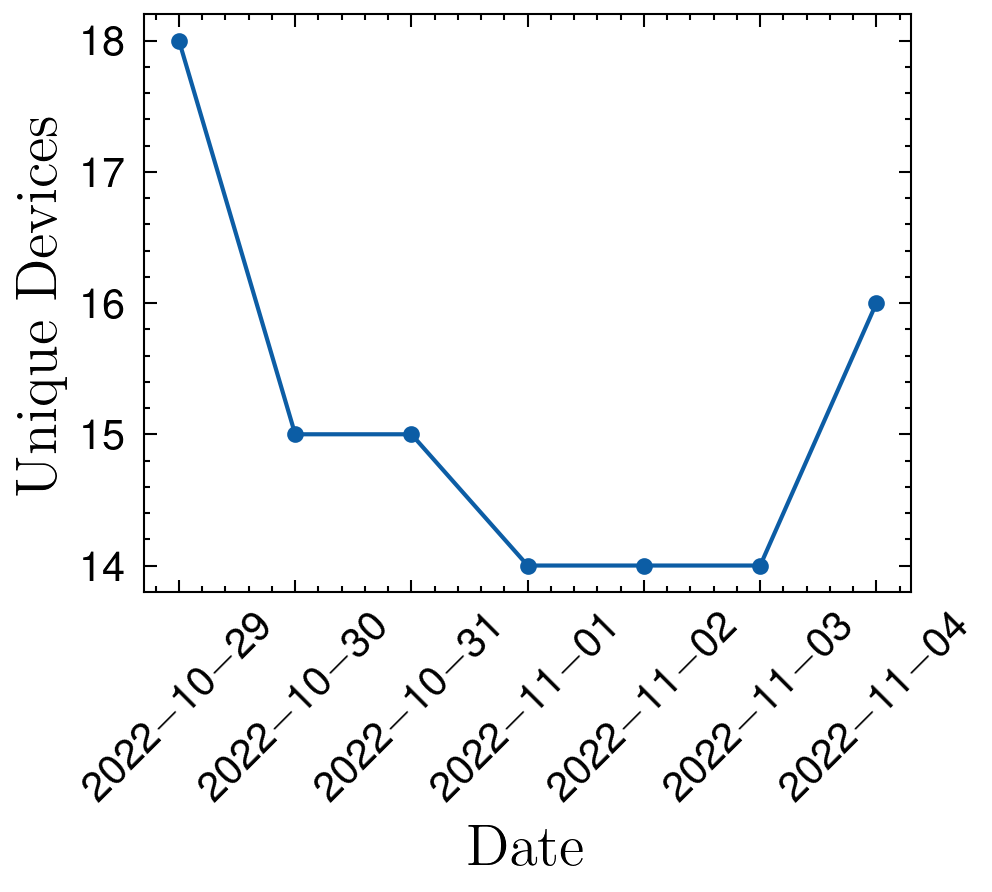

In [24]:
# plot the data
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "font.size": 16,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.style.use(['science', 'nature'])
plt.rcParams.update(tex_fonts)

fig, ax = plt.subplots(dpi=300)
# ax = sns.lineplot(x='date', y='count', data=df_date, marker='x', markerfacecolor = 'blue')
ax.plot(df_date['date'], df_date['count'], marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Unique Devices')
# ax.set_ylim(40, 70)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)
# save the plot
plt.savefig('number_of_devices.pdf', dpi=300, bbox_inches='tight')

In [33]:
df

,src_ip,dst_ip,src_mac,dst_mac,src_port,dst_port,protocol,timestamp,date
0,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50760,1900,UDP,2022-10-29 17:37:47.387837,2022-10-29
1,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50760,1900,UDP,2022-10-29 17:37:47.388323,2022-10-29
2,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50760,1900,UDP,2022-10-29 17:37:47.388815,2022-10-29
3,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50759,1900,UDP,2022-10-29 17:37:47.389267,2022-10-29
4,10.0.0.73,255.255.255.255,b0:37:95:9b:0c:ba,ff:ff:ff:ff:ff:ff,56700,56700,UDP,2022-10-29 17:37:50.076424,2022-10-29
...,...,...,...,...,...,...,...,...,...
1374841,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50760,1900,UDP,2022-11-04 20:10:05.141184,2022-11-04
1374842,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50760,1900,UDP,2022-11-04 20:10:05.141456,2022-11-04
1374843,169.254.100.1,239.255.255.250,1c:93:7c:15:fa:e8,01:00:5e:7f:ff:fa,50759,1900,UDP,2022-11-04 20:10:05.141730,2022-11-04
1374844,10.0.0.203,224.0.0.251,6a:56:cb:af:2c:f9,01:00:5e:00:00:fb,5353,5353,UDP,2022-11-04 20:10:07.027641,2022-11-04


In [19]:
def get_man_mac_macvendors(mac):
    API_KEY = 'at_tmi26iwW9hN7KhCxsj2MPGv5WaCOP'

    url = f'https://api.macvendors.com/{mac}'

    headers = {
        'Accept': 'application/json',
        'Content-Type': 'application/json',
        'X-Authentication-Token': API_KEY
    }

    response = requests.get(url, headers=headers)
    return response.text

In [28]:
src_macs  = [mac_addr(i) for i in src_macs]

dst_macs  = [mac_addr(i) for i in dst_macs]

In [20]:
def get_manu_mac_macaddress(mac):
  API_KEY = 'at_tmi26iwW9hN7KhCxsj2MPGv5WaCOP'

  url = f'https://api.macaddress.io/v1?apiKey={API_KEY}&output=vendor&search={mac}'

  response = requests.get(url)
  return response.text

In [30]:
mac_manufacturers = []
for mac in tqdm(src_macs):
  mac_manufacturers.append(get_man_mac_macvendors(mac))
  time.sleep(1)

100%|██████████| 27/27 [00:35<00:00,  1.32s/it]


In [31]:
for mac in tqdm(dst_macs):
  mac_manufacturers.append(get_man_mac_macvendors(mac))
  time.sleep(1)

100%|██████████| 412/412 [09:08<00:00,  1.33s/it]


In [32]:
len(mac_manufacturers)

439

In [25]:
# count occurences of each manufacturer
from collections import Counter
mac_manufacturers = Counter(mac_manufacturers)
# remove errors
# mac_manufacturers.pop('{"errors":{"detail":"Not Found"}}')

KeyError: '{"errors":{"detail":"Not Found"}}'

In [26]:
mac_manufacturers

Counter({'Invalid MAC or OUI address was received.': 439})

In [58]:
# convert to dataframe
import pandas as pd
mac_manufacturers = pd.DataFrame(mac_manufacturers.items(), columns=['Manufacturer', 'Count'])

In [60]:
mac_manufacturers.to_latex('mac_manufacturers.tex', index=False)

In [49]:
dst_macs = [mac_addr(i) for i in dst_macs]

In [50]:
dst_macs

['33:33:ff:c7:a6:cc',
 '33:33:ff:e4:3b:26',
 '33:33:ff:d4:bd:19',
 '33:33:ff:f5:0e:b2',
 '33:33:ff:38:1c:39',
 '33:33:ff:23:34:48',
 '33:33:ff:d9:b8:e1',
 '33:33:ff:20:46:ec',
 '33:33:ff:b0:0a:c1',
 '33:33:ff:43:3d:cc',
 '1a:64:8b:78:c0:04',
 '33:33:ff:ca:52:26',
 '33:33:ff:f2:52:7e',
 '33:33:ff:f3:06:9f',
 '33:33:ff:c9:81:60',
 '33:33:ff:2f:c5:9a',
 '33:33:ff:64:a6:95',
 '33:33:ff:ed:3f:30',
 '33:33:ff:36:4f:94',
 '33:33:ff:3d:be:91',
 '33:33:ff:1e:52:8d',
 '33:33:ff:ef:ab:a6',
 '33:33:ff:b8:18:34',
 '33:33:ff:46:fb:62',
 '33:33:ff:ca:b3:73',
 '33:33:ff:06:4d:10',
 '33:33:ff:31:21:5e',
 'ff:ff:ff:ff:ff:ff',
 '33:33:ff:a2:d9:94',
 '33:33:ff:01:bf:5b',
 '33:33:ff:0c:46:47',
 '33:33:ff:64:10:71',
 '33:33:ff:d9:11:db',
 '33:33:ff:56:3e:4f',
 '33:33:ff:d5:ee:ca',
 '2a:5f:89:d1:a8:06',
 '33:33:ff:db:37:b4',
 'aa:f0:0f:92:20:45',
 '33:33:ff:20:0e:68',
 '33:33:ff:51:90:03',
 '33:33:ff:41:c4:98',
 '33:33:ff:5b:78:7f',
 '33:33:ff:ab:a4:b3',
 '33:33:ff:40:44:73',
 '33:33:ff:9b:d0:13',
 '33:33:ff

In [45]:
dst_macs = list(dst_macs)

In [42]:
mac_manufacturers = set(mac_manufacturers)

In [43]:
mac_manufacturers

{'',
 'Apple, Inc',
 'Arris Group, Inc',
 'Intel Corp',
 'LG Electronics',
 'Raspberry Pi Foundation',
 'Samsung Electronics Co, Ltd',
 'Sony Interactive Entertainment Inc'}

In [10]:
count

5114869

In [11]:
len(src_macs)

27

In [16]:
src_macs = [mac_addr(i) for i in src_macs]

In [17]:
print(src_macs)

['b8:27:eb:06:f5:4a', 'b0:37:95:9b:0c:ba', '3c:06:30:37:b4:93', '26:9d:8a:31:32:01', 'dc:71:96:cc:ee:e4', 'ba:51:b1:5f:d2:d9', '2a:5f:89:d1:a8:06', 'b8:27:eb:53:a0:1f', 'aa:f0:0f:92:20:45', 'f8:46:1c:80:fc:eb', '54:b8:02:a7:7e:53', '1a:64:8b:78:c0:04', '92:4a:5b:34:c0:a6', '58:6c:25:14:2d:64', '32:31:ca:57:c0:10', 'c6:a6:c7:3f:2f:9d', '8c:85:90:1b:7f:28', '54:6c:eb:ee:78:61', '5e:8a:18:93:54:52', '1a:2f:e4:38:0d:5c', '1c:93:7c:15:fa:e8', '6a:56:cb:af:2c:f9', 'ce:5c:6a:a7:72:5d', 'a4:9b:4f:10:02:35', '00:0a:f5:89:89:fd', 'b0:be:83:0e:aa:b7', '36:5b:bc:eb:69:4c']


In [13]:
len(src_ips)

584

In [ ]:
print("# of devices Hyde", len([i for i in src_ips if i.startswith('10.0.')]))

In [ ]:
ips_jekyll = set()

In [ ]:
for arp_file in os.listdir("ARP"):
    with open("ARP/" + arp_file) as f:
        arp = f.read().strip().split('\n')
        devices = arp[2:-3]
        for device in devices:
            ip = device.split('\t')[0]
            if '10.0.0' in ip:
                ips_jekyll.add(ip)

In [ ]:
ips_jekyll